# Lecture 1

# readin the GNIP dataset and perform basic plotting and trend analysis operations

In [3]:
import pandas as pd # for data handling
import numpy as np # for mathematical operations
from datetime import datetime,timedelta # for working with dates
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import matplotlib
import pickle
import csv


def fit(data1, data2, order=1):
    """
    This function returns the best fit between data points
    data1, data2: two datasets
    order: 1 = linear fit, 2 = quadratic fit, 3 = cubic fit...
    """
    dummy=np.isfinite(data1*data2)
    param=np.polyfit(data1[dummy], data2[dummy],order)
    return param



__GNIP measurement network__

__Data taken from the GNIP Database (https://www.iaea.org/services/networks/gnip)__
The Global Network of Isotopes in Precipitation (GNIP) is a worldwide isotope monitoring network of hydrogen and oxygen isotopes in precipitation, initiated in 1960 by the International Atomic Energy Agency (IAEA) and the World Meteorological Organization (WMO), and operates in cooperation with numerous partner institutions in Member States.

Extracted for this excercise: Monthly Data from 1990-2020

IAEA/WMO. Global Network of Isotopes in Precipitation. The GNIP Database. Accessible at: https://nucleus.iaea.org/wiser

In [25]:
# readin the GNIP dataset
# 1990-2020 - 30 years

# Measurand Symbols: 
#O18
#H2
#H3
#Vp
#Precipitation
#TempAir

has_pickle=True


if has_pickle != 1:
    file='GNIP_1990_2020_PrecipitationMonthly.xlsx'
    df=pd.read_excel(file,index_col='Sample Date',parse_dates=True,usecols=['Latitude','Longitude','Altitude','Country ISO Code','Sample Date','Sample Media Type Name','Measurand Symbol','Measurand Amount','Measurand Uncertainty','Measurand Unit'])
    df.index=pd.to_datetime(df.index,utc=True)
    # save to pickle for faster loading
    df.to_pickle('GNIP_1990_2020_PrecipitationMonthly.pkl')
else:
    df=pd.read_pickle('GNIP_1990_2020_PrecipitationMonthly.pkl')

print(df.head())

                            Latitude  Longitude  Altitude Country ISO Code  \
Sample Date                                                                  
1990-01-14 23:00:00+00:00  68.683333      21.53     403.0               SE   
1990-01-14 23:00:00+00:00  68.683333      21.53     403.0               SE   
1990-01-14 23:00:00+00:00  68.683333      21.53     403.0               SE   
1990-01-14 23:00:00+00:00  68.683333      21.53     403.0               SE   
1990-01-14 23:00:00+00:00  68.683333      21.53     403.0               SE   

                          Sample Media Type Name Measurand Symbol  \
Sample Date                                                         
1990-01-14 23:00:00+00:00  Rain & Snow ("mixed")              O18   
1990-01-14 23:00:00+00:00  Rain & Snow ("mixed")               H2   
1990-01-14 23:00:00+00:00  Rain & Snow ("mixed")               H3   
1990-01-14 23:00:00+00:00  Rain & Snow ("mixed")               Vp   
1990-01-14 23:00:00+00:00  Rain & Snow 

In [52]:
df.to_csv('GNIP_1990_2020_PrecipitationMonthly.csv',sep='\t')

In [72]:
dftest=pd.read_csv('GNIP_1990_2020_PrecipitationMonthly.csv',sep='\t',index_col=0,parse_dates=True)
dftest.index

DatetimeIndex(['1990-01-14 23:00:00+00:00', '1990-01-14 23:00:00+00:00',
               '1990-01-14 23:00:00+00:00', '1990-01-14 23:00:00+00:00',
               '1990-01-14 23:00:00+00:00', '1990-01-14 23:00:00+00:00',
               '1990-02-14 23:00:00+00:00', '1990-02-14 23:00:00+00:00',
               '1990-02-14 23:00:00+00:00', '1990-02-14 23:00:00+00:00',
               ...
               '2020-08-14 22:00:00+00:00', '2020-08-14 22:00:00+00:00',
               '2020-09-14 22:00:00+00:00', '2020-09-14 22:00:00+00:00',
               '2020-10-14 22:00:00+00:00', '2020-10-14 22:00:00+00:00',
               '2020-11-14 23:00:00+00:00', '2020-11-14 23:00:00+00:00',
               '2020-12-14 23:00:00+00:00', '2020-12-14 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Sample Date', length=292300, freq=None)

In [27]:
# turn large dataframe into individual smaller dataframes
dfd18O=df[df['Measurand Symbol']=='O18'].copy()
dfdD=df[df['Measurand Symbol']=='H2'].copy()
dfTemp=df[df['Measurand Symbol']=='TempAir'].copy()

# analyze the annual average per latitude for the different parameters 
dfdD.loc[:,'Year']=dfdD.index.year
dfdDlat = dfdD.groupby(['Year', 'Latitude'])[['Measurand Amount','Altitude']].mean()#.reset_index().set_index('Latitude')
dfdDlat.columns=['dD','Altt']

dfd18O.loc[:,'Year']=dfd18O.index.year
dfd18Olat = dfd18O.groupby(['Year', 'Latitude'])[['Measurand Amount','Altitude']].mean()#.reset_index().set_index('Latitude')
dfd18Olat.columns=['d18O','Altitude']

dfTemp.loc[:,'Year']=dfTemp.index.year
dfTemplat = dfTemp.groupby(['Year', 'Latitude'])[['Measurand Amount','Altitude']].mean()#.reset_index().set_index('Latitude')
dfTemplat.columns=['T_C','alt']

# combine the datasets into an annual averages dataset by latitude
dfdlatT=pd.concat([dfd18Olat,dfdDlat,dfTemplat],axis=1)
dfdlatT=dfdlatT.reset_index().set_index('Latitude')



__plot d18O against temperature and "replot" the figure of Dansgaard 1964__

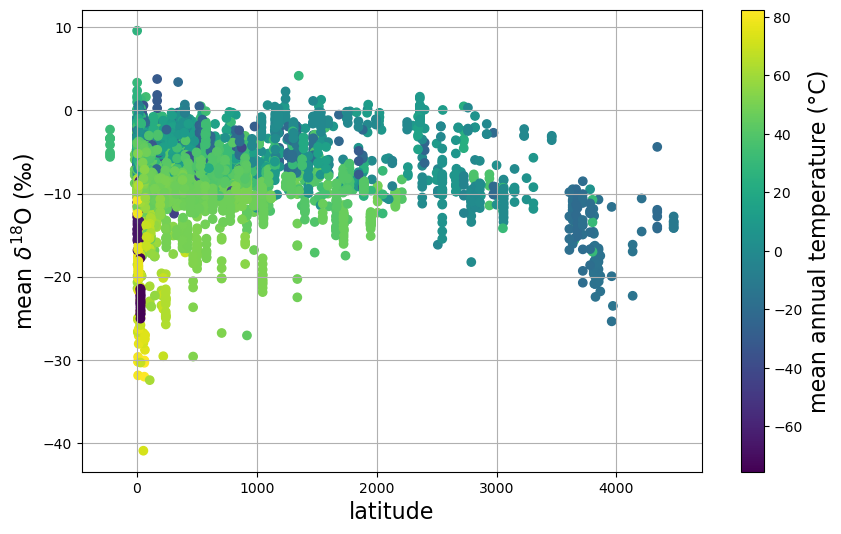

In [111]:
fig1,ax1=plt.subplots(1,1,figsize=(10,6))

sc=ax1.scatter(dfdlatT['d18O'],,c=dfdlatT.index)
cbar = fig1.colorbar(sc, ax=ax1)
cbar.set_label('mean annual temperature (°C)',fontsize=16)
ax1.grid()

ax1.set_xlabel(r'latitude',fontsize=16)
ax1.set_ylabel(r'mean $\delta^{18}$O (‰)',fontsize=16)
fig1

__Plot the latitudinal dependency.. can you explain the "anomalous" datapoints?__

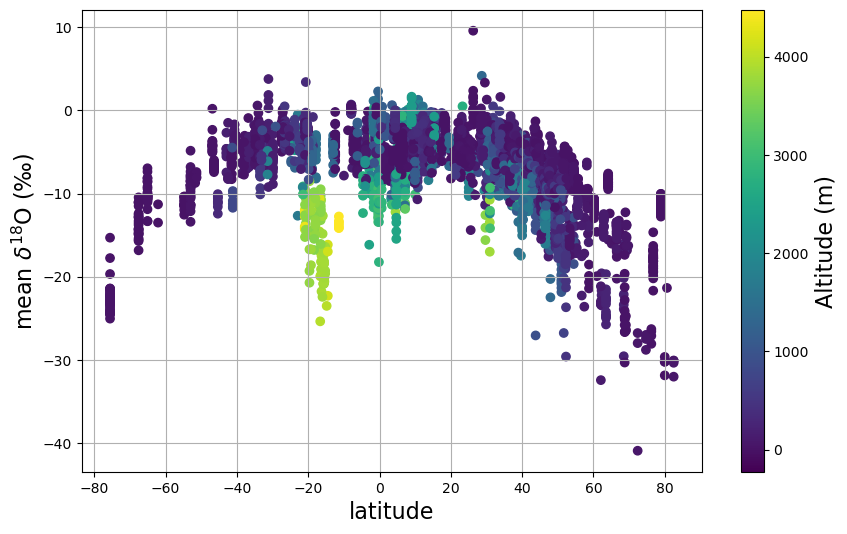

In [107]:
fig1,ax1=plt.subplots(1,1,figsize=(10,6))
sc=ax1.scatter(dfdlatT.index,dfdlatT['d18O'],c=dfdlatT['Altitude'])
cbar = fig1.colorbar(sc, ax=ax1)
cbar.set_label('Altitude (m)',fontsize=16)
ax1.grid()

ax1.set_xlabel(r'latitude',fontsize=16)
ax1.set_ylabel(r'mean $\delta^{18}$O (‰)',fontsize=16)

fig1

In [127]:
# its the high altitude regions... look at specifically which countries the samples were taken from:

dfd18O[(dfd18O['Altitude']>3500)&(dfd18O['Latitude']>-30)&(dfd18O['Latitude']<-10)]['Country ISO Code'].drop_duplicates()

Sample Date
1995-09-14 22:00:00+00:00    BO
2000-01-14 23:00:00+00:00    PE
Name: Country ISO Code, dtype: object

__using the 30 years data, plot the GMWL__

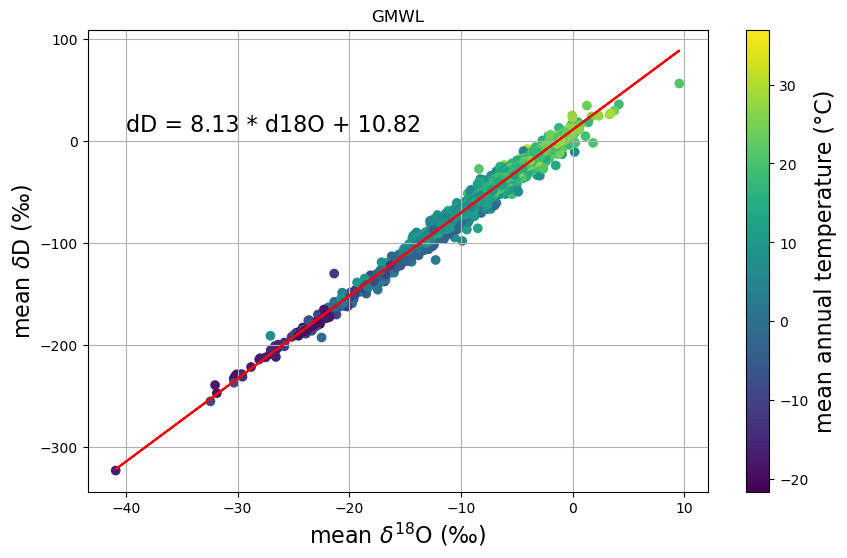

In [94]:
# the d18O vs dD plot - GMWL
fig1,ax1=plt.subplots(1,1,figsize=(10,6))

sc=ax1.scatter(dfdlatT['d18O'],dfdlatT['dD'],c=dfdlatT['T_C'])
cbar = fig1.colorbar(sc, ax=ax1)
cbar.set_label('mean annual temperature (°C)',fontsize=16)
ax1.grid()

ax1.set_ylabel(r'mean $\delta$D (‰)',fontsize=16)
ax1.set_xlabel(r'mean $\delta^{18}$O (‰)',fontsize=16)


#the linear fit
param=fit(dfdlatT['d18O'],dfdlatT['dD'])

ax1.plot(dfdlatT['d18O'],np.polyval(param,dfdlatT['d18O']),c='red')
ax1.text(-40,10,f'dD = {np.round(param[0],2)} * d18O + {np.round(param[1],2)}',fontsize=16)
ax1.set_title('GMWL',fontsize=16)

fig1

# Part 2: Difference between saturation vapor pressure over liquid and ice

__Task 2.1: install and import the typhon module https://www.radiativetransfer.org/misc/typhon/doc/typhon.physics.html__

In [ ]:
install typhon

In [85]:
# import the vapor pressure formulas by Murphy&Koop 2005 doi:10.1256/qj.04.94
from typhon.physics import e_eq_ice_mk,e_eq_water_mk

__Task 2.2: calculate the saturation vapor pressure over liquid and ice for a temperature range from -40 to 0 C__

In [7]:
# calculate the saturation vapor pressure using the typhon functions, check the units to put in
Tvec=np.arange(-40,0,0.5)
esat_liquid=e_eq_water_mk(Tvec+273.15)
esat_ice=e_eq_ice_mk(Tvec+273.15)


ratio=esat_liquid/esat_ice

__Task 2.3: plot the vapor pressure function over liquid and ice over a temperature range from -40 to 0 C, and add the difference between the two functions in a subplot__

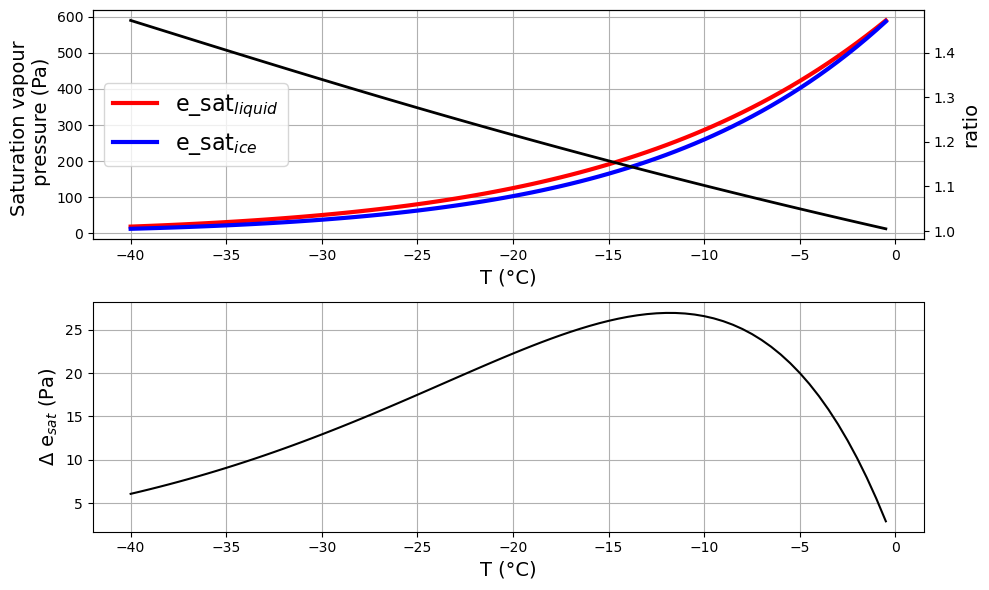

In [79]:
plt.close('all')
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,6))

ax1.plot(Tvec,esat_liquid,'r-',label=u'e_sat$_{liquid}$',lw=3)
ax1.plot(Tvec,esat_ice,'b-',label=u'e_sat$_{ice}$',lw=3)
ax1.legend(loc='center left',fontsize=16)
ax1.set_xlabel('T (°C)',fontsize=14)
ax1.set_ylabel('Saturation vapour \n pressure (Pa)',fontsize=14)
ax1i=ax1.twinx()
ax1i.plot(Tvec,ratio,lw=2,color='k')

ax1i.set_ylabel('ratio',fontsize=14)


ax2.plot(Tvec,esat_liquid - esat_ice,'k-')

ax2.set_xlabel('T (°C)',fontsize=14)
ax2.set_ylabel(r'$\Delta$ e$_{sat}$ (Pa)',fontsize=14)
ax1.grid()
ax2.grid()
fig.tight_layout()
plt.show()


__Task 2.4: Question: At which air temperature is the difference between saturation vapor pressure over liquid and solid most pronounced?__